In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
 df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.drop(columns='Car_Name',inplace = True)

In [9]:
df.head

<bound method NDFrame.head of      Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0    2014           3.35           5.59       27000    Petrol      Dealer   
1    2013           4.75           9.54       43000    Diesel      Dealer   
2    2017           7.25           9.85        6900    Petrol      Dealer   
3    2011           2.85           4.15        5200    Petrol      Dealer   
4    2014           4.60           6.87       42450    Diesel      Dealer   
..    ...            ...            ...         ...       ...         ...   
296  2016           9.50          11.60       33988    Diesel      Dealer   
297  2015           4.00           5.90       60000    Petrol      Dealer   
298  2009           3.35          11.00       87934    Petrol      Dealer   
299  2017          11.50          12.50        9000    Diesel      Dealer   
300  2016           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  
0         Manual   

In [10]:
df['Current_Year'] =2021

In [11]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021


In [12]:
df['Total_Years'] = df.Current_Year - df.Year

In [13]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Total_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021,5
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021,6
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021,12
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021,4


In [14]:
df.drop(columns=['Year','Current_Year'],inplace = True)

In [15]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [16]:
 df= pd.get_dummies(df,drop_first = True)

In [17]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [18]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Total_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


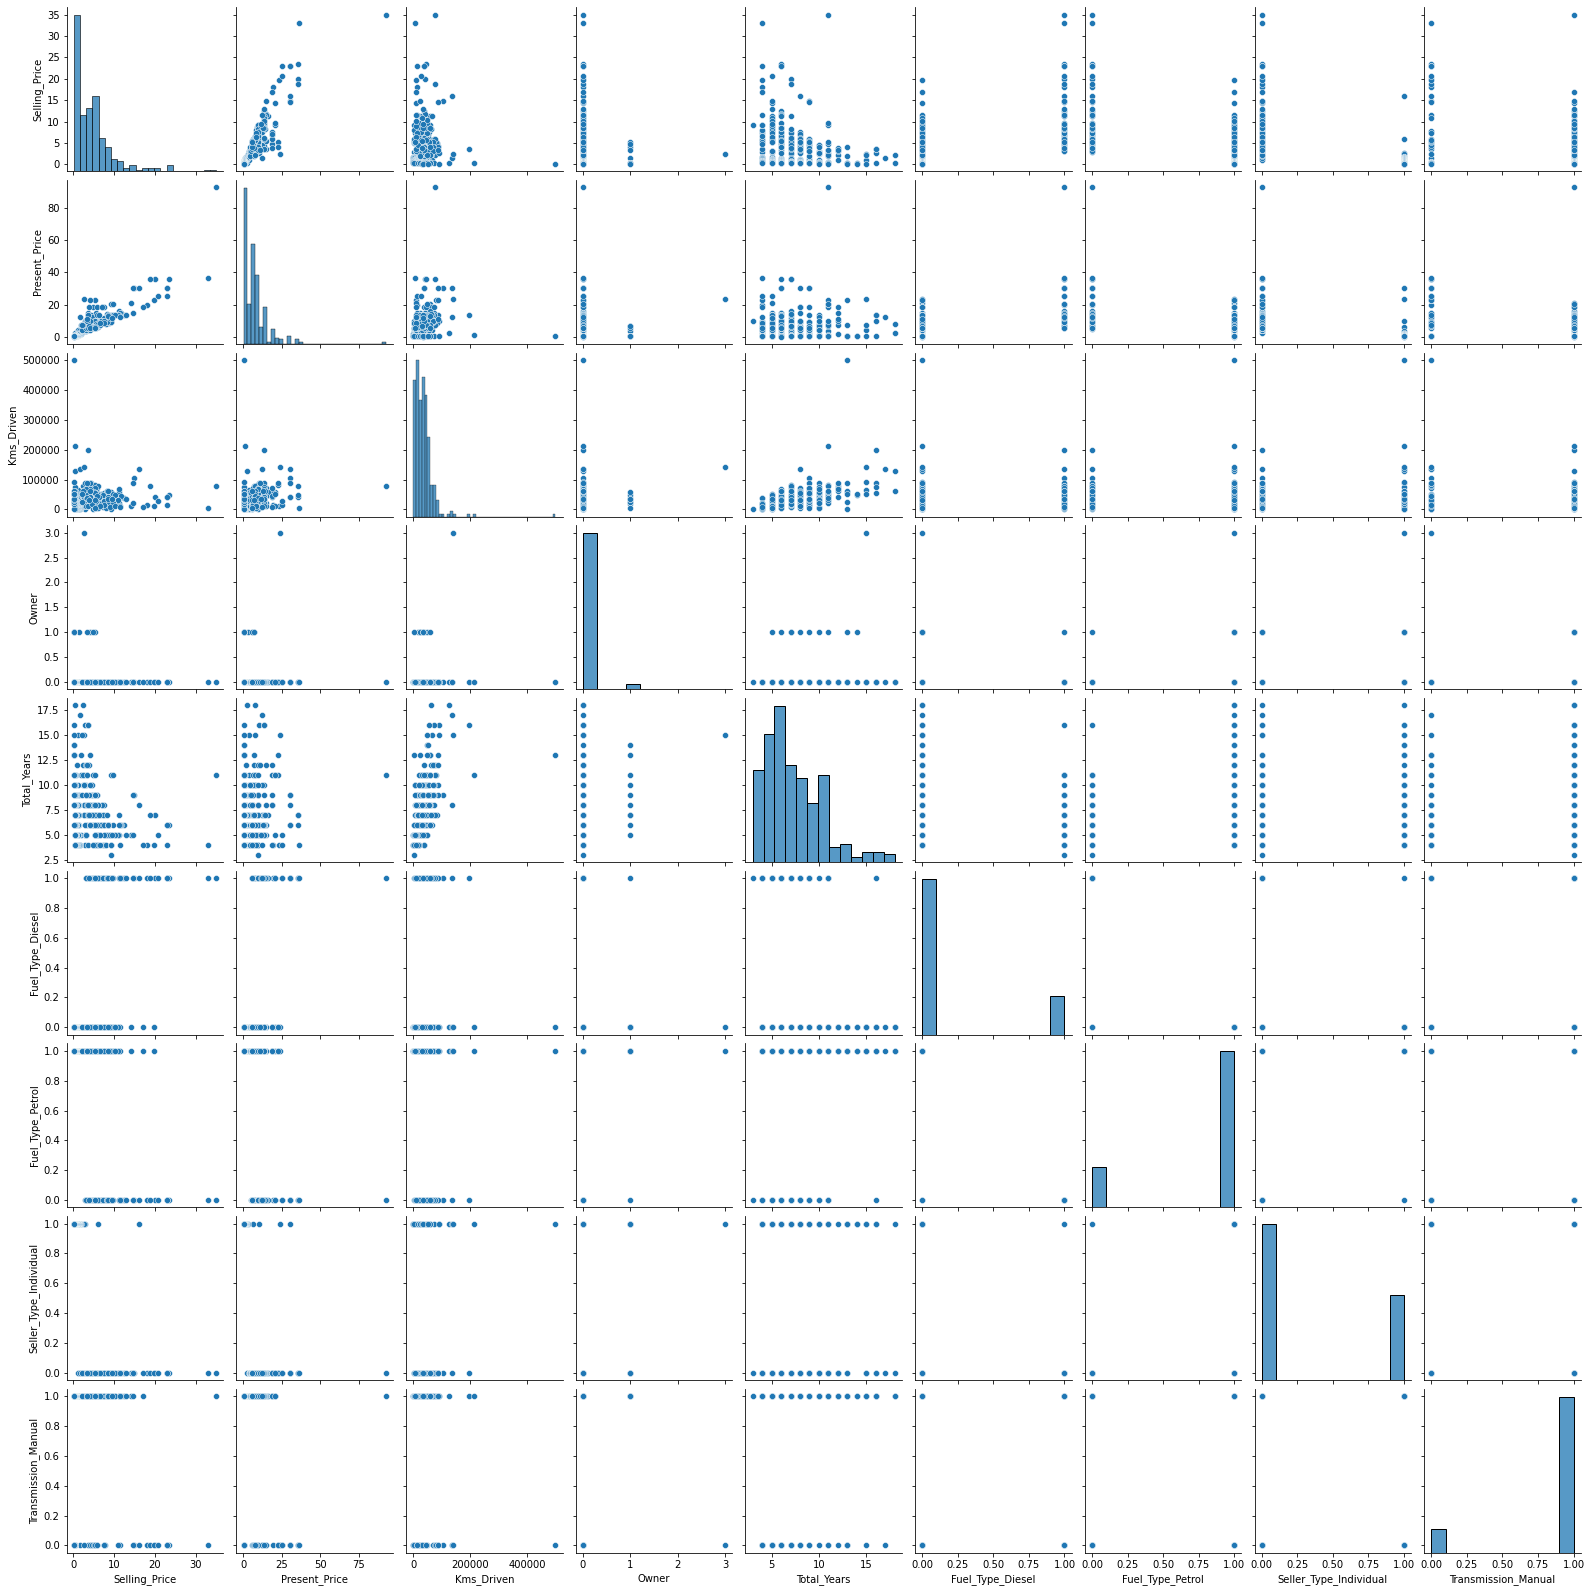

In [19]:
sns.pairplot(df) 

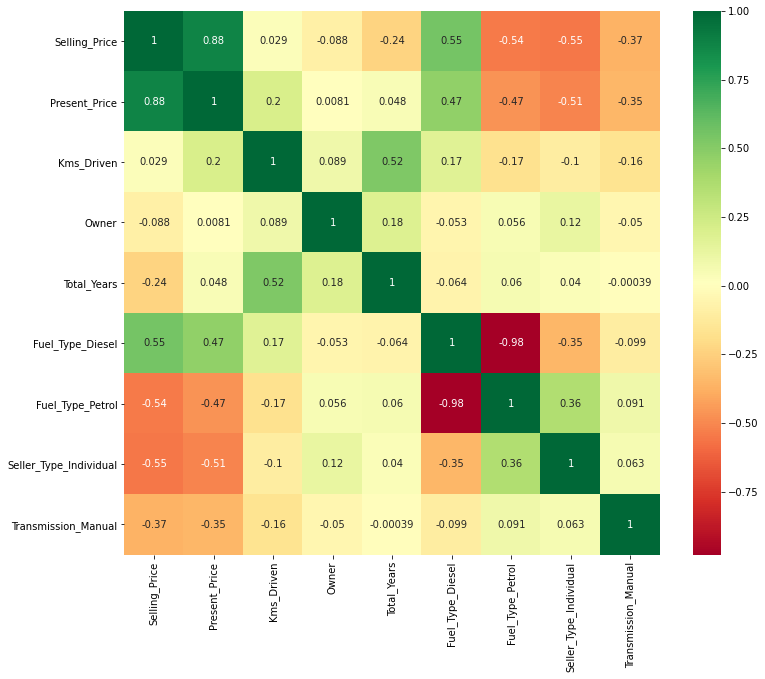

In [20]:
plt.figure(figsize = (12,10))
corrmat = df.corr()
corr_feature = corrmat.index

#heat map
sns.heatmap(df[corr_feature].corr(),annot = True, cmap = 'RdYlGn')

plt.show()

In [21]:
#indeptndent and dependent features
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
print(x)
print(y)

     Present_Price  Kms_Driven  Owner  Total_Years  Fuel_Type_Diesel  \
0             5.59       27000      0            7                 0   
1             9.54       43000      0            8                 1   
2             9.85        6900      0            4                 0   
3             4.15        5200      0           10                 0   
4             6.87       42450      0            7                 1   
..             ...         ...    ...          ...               ...   
296          11.60       33988      0            5                 1   
297           5.90       60000      0            6                 0   
298          11.00       87934      0           12                 0   
299          12.50        9000      0            4                 1   
300           5.90        5464      0            5                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1

In [22]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[0.38884335 0.0423064  0.00042552 0.07527904 0.22847946 0.00955878
 0.12186705 0.13324041]


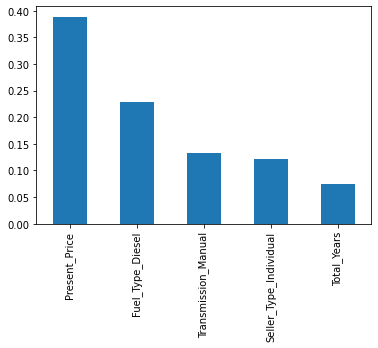

In [24]:
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(5).plot(kind = 'bar')
plt.show()

In [25]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [26]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(240, 8) (61, 8) (240,) (61,)


In [27]:
#random forest regressor
rf_random = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]


In [28]:
#randomized search cv

#no of features to consider at every split
max_features = ['auto','sqrt']

#max no of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

#min no of samples required to split a node
min_samples_split = [2,5,10,15,100]

#min no of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [29]:
#Randomized search cv

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [30]:
# using the random grid to search for best hyperparameters
# first create the base model to tune
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring ='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 2 )


In [31]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
predictions = rf_random.predict(x_test)
predictions

array([ 5.46949934,  1.06672862,  0.51961226,  7.56008729,  1.94613948,
       10.58731891,  7.90665768, 21.30909508,  0.31471287, 10.24000967,
        2.8272075 ,  6.79486571,  5.48641121,  6.37517278,  4.04244421,
        2.27291736,  7.75775173,  0.53724353,  5.75008601,  4.4275306 ,
        4.21193455,  7.0247228 ,  0.24302893,  0.43941927,  4.02759464,
        4.67716832,  4.65271505,  7.85057098,  4.93078122,  6.32701131,
       14.21234571,  1.15371482,  0.29367941,  4.87255885,  0.30312758,
        1.12444293,  3.00177148,  3.37445052,  0.45753846,  4.54038066,
        5.5890627 ,  5.96702602, 10.35170807,  0.48798188,  0.26375365,
        0.23726569,  1.18578329,  0.48049951,  2.89580194,  4.82498146,
        2.69873691,  1.19009266,  3.61433119,  5.66554062,  1.05581158,
        0.45803972,  0.55289064,  0.68434777,  5.49156896,  4.16367285,
        1.19999816])

c:\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

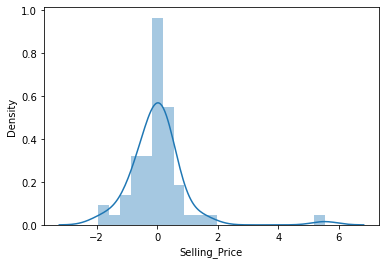

In [33]:
sns.distplot(y_test-predictions)

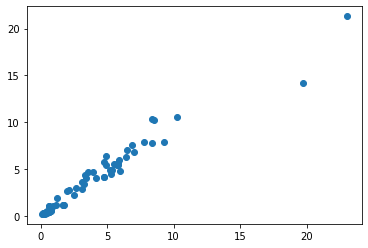

In [34]:
plt.scatter(y_test,predictions)

In [35]:
# dump the information in pickle file
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)